# Sprint 7. Algoritmos de aprendizaje supervisado: Clasificación

## Tarea M7 T01

### Ejercicio 1: Crea por lo menos dos modelos de clasificación diferentes para intentar predecir lo mejor las clases de vino.

Información sobre los atributos:

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline  


In [1]:
# Cargar el conjunto de datos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_wine

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['classes'] = pd.Categorical.from_codes(data.target, data.target_names)
print("Primer análisis de los datos:")
df.head()


Primer análisis de los datos:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,classes
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   alcohol                       178 non-null    float64 
 1   malic_acid                    178 non-null    float64 
 2   ash                           178 non-null    float64 
 3   alcalinity_of_ash             178 non-null    float64 
 4   magnesium                     178 non-null    float64 
 5   total_phenols                 178 non-null    float64 
 6   flavanoids                    178 non-null    float64 
 7   nonflavanoid_phenols          178 non-null    float64 
 8   proanthocyanins               178 non-null    float64 
 9   color_intensity               178 non-null    float64 
 10  hue                           178 non-null    float64 
 11  od280/od315_of_diluted_wines  178 non-null    float64 
 12  proline                       178 non-null    floa

In [3]:
# Mostramos una descripción de los datos

print("Descripción de los datos:")
df.describe().T

Descripción de los datos:


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [4]:
df = df.drop_duplicates()

In [5]:
print("No existe ningún null")

df.isnull().sum()

No existe ningún null


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
classes                         0
dtype: int64

Antes de crear los modelos de clasificación pertinentes para este Dataset , hemos realizado un primer análisis exploratorio, consideraremos varios aspectos, incluyendo la estructura del dataset, el tipo de datos y las estadisticas descritivas básicas.

Podemos observar lo siguiente:

- El dataset consta de 178 entradas y 14 columnas. Cada entrada representa una muestra de vino, y cada columna es una característica específica de estas muestras.

- De las 14 columnas, 13 son de tipo float64, lo que indica que son numéricas y continuas. La columna 'classes' es de tipo category, lo que sugiere que representa clasificaciones o categorías del vino.

- Todas las columnas tienen 178 valores no nulos, lo que indica que no hay valores faltantes en el dataset.

- De acuerdo a las estadisticas descriptivas observamos que los valores para cada característica numérica varían considerablemente, como se puede ver en los mínimos y máximos.

La media y la mediana están cercanas para la mayoría de las características, lo que sugiere una distribución relativamente simétrica para estas.
Algunas características muestran una mayor variabilidad que otras, como se refleja en sus desviaciones estándar.

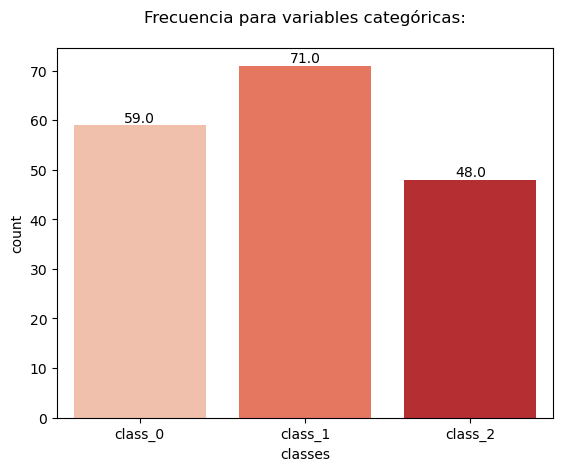

In [6]:
# Frecuencia de la variable categorica "classes"

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un gráfico de conteo para la variable 'classes'
ax = sns.countplot(x="classes", palette="Reds", data=df)

# Agregar las frecuencias en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_title("Frecuencia para variables categóricas:\n")

# Mostrar el gráfico
plt.show()



Segun el gráfico de la frecuencias de la variable "classes" podemos observar que existe una distribución desbalanceada. La  class_1 tiene la mayor frecuencia con 71 muestras, seguida por class_0 con 59 muestras y class_2 con 48 muestras. Esto indica que la distribución de las clases no es uniforme en el dataset.

Es importante tomar en cuenta esto porque el desbalance en la distribución de las clases puede influir en el rendimiento de los modelos de clasificación. Los modelos podrían tener una tendencia a predecir mejor la clase más frecuente y peor las menos frecuentes.

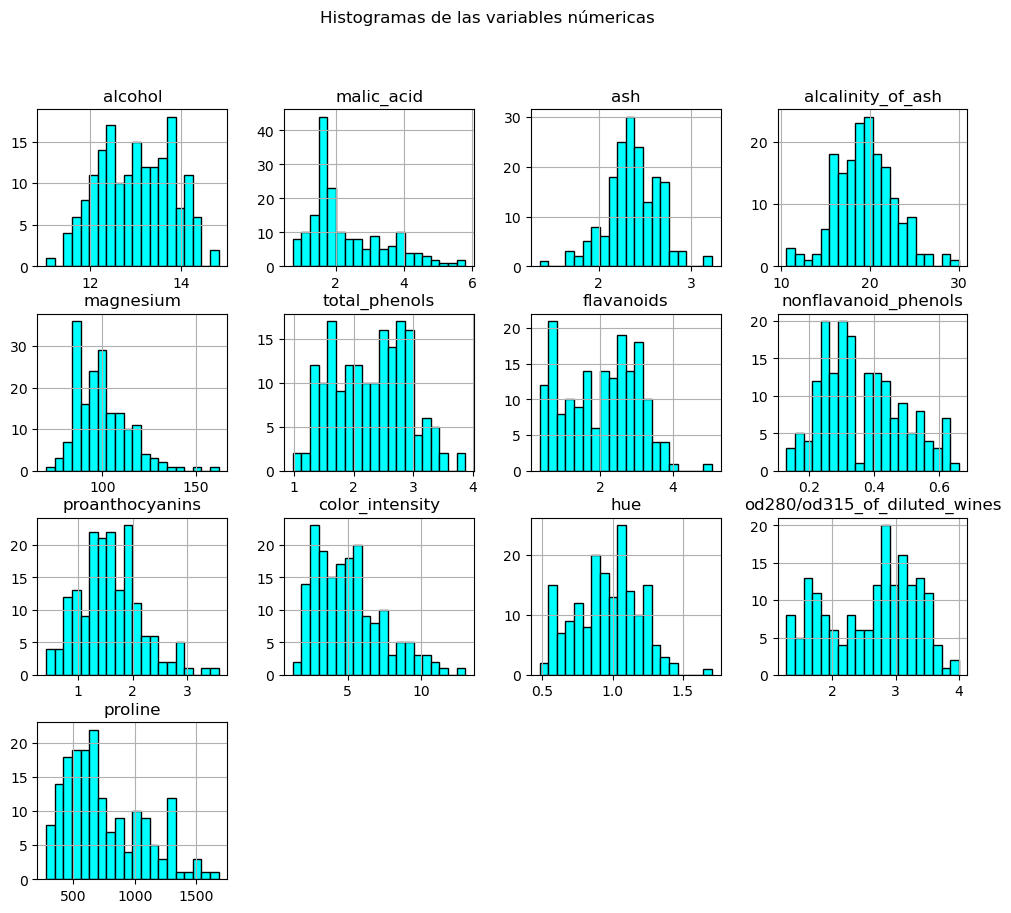

In [7]:
# Histogramas de las variables númericas

#Crear el hitograma de las variables
df.hist(bins=20, figsize=(12, 10), color='cyan',edgecolor='black')
plt.suptitle("Histogramas de las variables númericas")

#Mostrar el gráfico
plt.show()

El histograma de las variables númericas nos muestra lo suigiente:

- Alcohol: La distribución del alcohol parece ser aproximadamente normal, con la mayoría de los datos concentrados alrededor del rango medio. No hay señales claras de valores atípicos, lo que indica que la mayoría de los vinos tienen un contenido de alcohol dentro de un rango esperado.

- Malic Acid: Esta variable muestra una distribución sesgada hacia la derecha, con una cola larga que sugiere la presencia de algunos vinos con un alto contenido de ácido málico. Esto podría ser un indicador de ciertos tipos de vino o prácticas de vinificación.

- Ash: La variable ceniza muestra una distribución más o menos simétrica. Parece haber una concentración de valores alrededor del promedio, lo que indica una consistencia en este componente entre los diferentes vinos.

- Alcalinity of Ash: Hay un sesgo hacia valores más altos, con una cola hacia la derecha, pero la mayoría de los datos se agrupan cerca de la media, lo que sugiere que, aunque hay algunos valores atípicos, la alcalinidad de la ceniza no varía ampliamente.

- Magnesium: Existe una clara cola hacia valores más altos. Esto podría significar que mientras la mayoría de los vinos tienen un contenido de magnesio dentro de un rango, hay algunos vinos con niveles significativamente más altos.

- Total Phenols: La distribución es relativamente simétrica y centrada, lo que podría indicar que los fenoles totales varían menos entre los vinos y pueden no ser tan discriminativos para la clasificación como otras variables.

- Flavanoids: Similar a los fenoles totales, los flavonoides muestran una distribución bastante simétrica, aunque con un leve sesgo hacia la derecha, lo que sugiere una variabilidad moderada entre las muestras de vino.

- Nonflavanoid Phenols: Esta variable muestra una distribución con una cola hacia la derecha, pero la mayoría de los datos están agrupados hacia el centro.

- Proanthocyanins: La distribución es ligeramente sesgada hacia la derecha, con una concentración de valores alrededor del promedio, pero también con algunos valores atípicos altos.

- Color Intensity: Muestra una amplia distribución con varias modas, lo que puede indicar diferentes tipos de vino con intensidades de color variadas, posiblemente relacionadas con diferentes variedades de uva o métodos de vinificación.

- Hue: La distribución del tono es relativamente simétrica con una concentración de datos en el rango medio. Esto sugiere una variabilidad menor en esta característica.

- OD280/OD315 of Diluted Wines: La variable tiene una distribución ligeramente sesgada hacia la derecha con una concentración de datos cerca del promedio, indicando una variación moderada en la medida en que se diluyen los vinos.

- Proline: Esta variable muestra una distribución con una cola larga hacia valores más altos, indicando la presencia de valores atípicos. Dado que la proline es un aminoácido importante en los vinos, su variabilidad podría ser significativa para la clasificación.

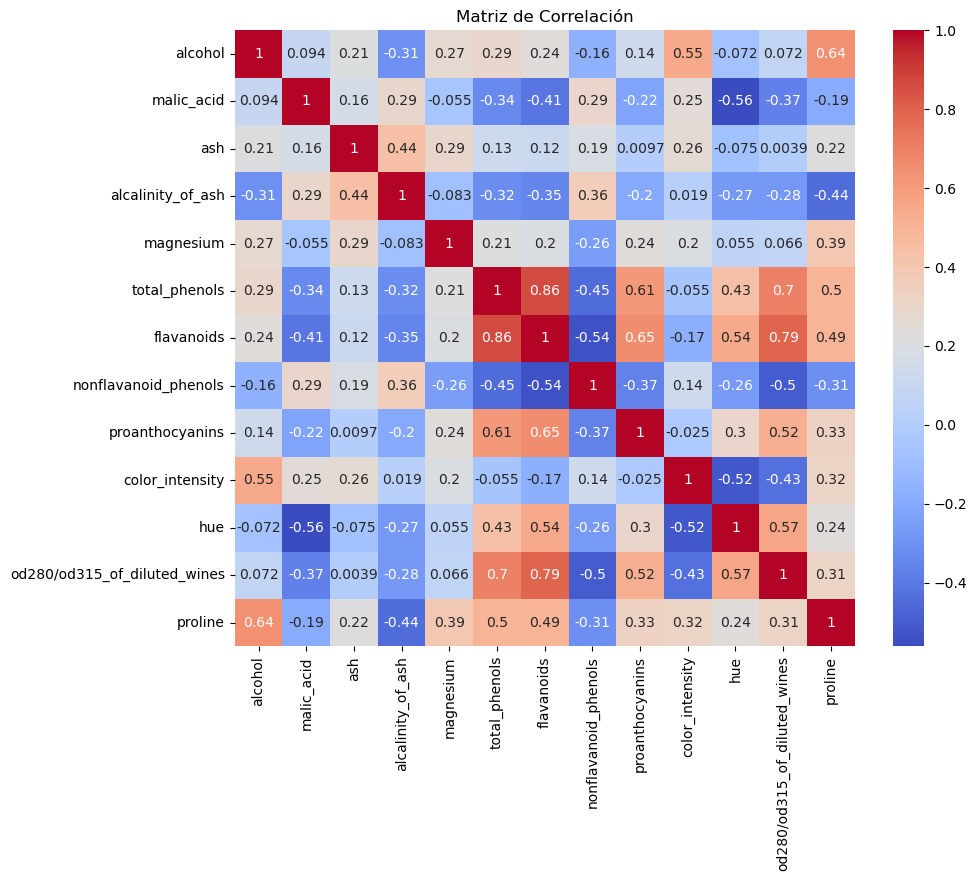

In [8]:
# Mapa de calor de  la Matriz correlación

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlación')
plt.show()


Gracias al mapa de calor de las correlaciones de las variables númericas podemos inferir lo siguiente:


- Correlaciones Fuertes: Las variables "total_phenols" y "flavanoids" tienen una fuerte correlación positiva (0.86), lo que sugiere que pueden influir de manera similar en las propiedades del vino. De igual manera, "od280/od315_of_diluted_wines" también muestra una fuerte correlación positiva con "flavanoids" (0.79) y "total_phenols" (0.7), indicando que estas medidas podrían estar relacionadas con la presencia de compuestos fenólicos en el vino.

- Correlaciones Moderadas: "color_intensity" tiene una correlación moderada con alcohol (0.55) y una correlación negativa moderada con hue (-0.52), lo cual puede indicar que vinos con mayor intensidad de color tienden a tener mayor contenido de alcohol y un tono de color más oscuro.

- Correlaciones Débiles o Insignificantes: Algunas variables, como "malic_acid" con "ash" o "alcalinity_of_ash" con "magnesium", muestran correlaciones muy débiles, lo que sugiere que no hay una relación lineal directa entre estas.

- Correlaciones Negativas: "flavanoids" y "nonflavanoid_phenols" tienen una correlación negativa (-0.54), lo que podría indicar que a medida que aumenta el contenido de flavanoides, generalmente disminuye el contenido de fenoles no flavonoides, o viceversa.



In [9]:
# Seleción de Características
from sklearn.model_selection import train_test_split 

# Definir las variables independientes y la variable objetivo
X = df.drop('classes', axis=1) # Caracteristicas
y = df['classes'] # Objetivo


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [10]:
# Creamos un modelo Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Creamos Decision Tree classifer object
clf = DecisionTreeClassifier()

# # Entrenar el modelo con el conjunto de entrenamiento
clf = clf.fit(X_train,y_train)

# Predecir las clases para el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el modelo

print(f"Decision Tree Model:\n{confusion_matrix(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Decision Tree Model:
[[22  1  0]
 [ 1 17  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

     class_0       0.96      0.96      0.96        23
     class_1       0.94      0.89      0.92        19
     class_2       0.92      1.00      0.96        12

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.94      0.94      0.94        54



In [11]:
# Creamos un  modelo KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con el conjunto de entrenamiento
knn.fit(X_train, y_train)

# Predecir las clases para el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el modelo
print(f"KNN:\n{confusion_matrix(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

KNN:
[[21  0  2]
 [ 2 12  5]
 [ 0  7  5]]
              precision    recall  f1-score   support

     class_0       0.91      0.91      0.91        23
     class_1       0.63      0.63      0.63        19
     class_2       0.42      0.42      0.42        12

    accuracy                           0.70        54
   macro avg       0.65      0.65      0.65        54
weighted avg       0.70      0.70      0.70        54



### Ejercicio 2: Compara los modelos de clasificación utilizando la precisión (accuracy), una matriz de confusión y otras métricas más avanzadas.



Para comparar los modelos "Decision Tree" y "KNN" vamos a utilizar las métricas proporcionadas anteriormente, analizaremos cada métrica por separado:

* Precisión (Precision): 

  Decision Tree Model: Clase 0: 0.96, Clase 1: 0.94, Clase 2: 0.92.

  KNN: Clase 0: 0.91, Clase 1: 0.63, Clase 2: 0.42.
  
El modelo de Decision Tree tiene una precisión significativamente más alta en todas las clases en comparación con KNN.

* Recuerdo (Recall):

  Decision Tree Model: Clase 0: 0.96, Clase 1: 0.89, Clase 2: 1.00

  KNN: Clase 0: 0.91, Clase 1: 0.63, Clase 2: 0.42

Nuevamente, el modelo de Decision Tree supera a KNN en todas las clases.

* Puntuación F1 (F1-Score):

  Decision Tree Model: Clase 0: 0.96, Clase 1: 0.92, Clase 2: 0.96

  KNN: Clase 0: 0.91, Clase 1: 0.63, Clase 2: 0.42

El modelo de Decision Tree mantiene una ventaja significativa en términos de F1-Score para todas las clases.

* Precisión Media (Accuracy)

  Decision Tree Model: 0.94

  KNN: 0.70

El modelo de Decision Tree tiene una precisión media mucho más alta, lo que sugiere un mejor rendimiento general.

* Promedio Macro (Macro Avg)

  Decision Tree Model: 0.95

  KNN: 0.65

El modelo de Decision Tree tiene un promedio macro superior, lo que indica un mejor rendimiento promedio a través de todas las clases.

* Promedio Ponderado (Weighted Avg): 

  Decision Tree Model: 0.94

  KNN: 0.70

Similar a la precisión media, el modelo de Decision Tree supera al KNN en el promedio ponderado.

En conclusión, el modelo de Decision Tree supera al modelo KNN en todas las métricas consideradas, esto sugiere que el modelo de Decision Tree es el mejor de los dos para este conjunto de datos específico.Es importante destacar que estos resultados son específicos para este conjunto de datos y su estado sin preprocesamiento o reducción de dimensionalidad. El rendimiento de los modelos puede variar significativamente con la aplicación de técnicas de preprocesamiento.


###  Ejercicio 3: Entrena usando los diferentes parámetros que admiten para mejorar su predicción.

Para entrenar con diferentes parametros, hemos utilizado GrindSearch. El grid search en Python es un método de búsqueda que toma en cuenta diferentes combinaciones de hiperparámetros y elige la combinación que arroja un margen de error más bajo. Realiza una búsqueda exhaustiva sobre el espacio de parámetros definido. Esto significa que explora todas las combinaciones posibles de los valores de parámetros, proporcionando una visión completa de cómo cada combinación afecta al rendimiento del modelo. Ademas, integra la validación cruzada, lo que significa que cada combinación de parámetros se evalúa en diferentes subconjuntos del conjunto de datos. Esto ayuda a obtener una estimación más fiable del rendimiento del modelo y asegura que los parámetros seleccionados no estén sobreajustados a un subconjunto particular de los datos.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo
clf = DecisionTreeClassifier()

# Definir el espacio de búsqueda de parámetros ajustado
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],  # Reducido para evitar sobreajuste en un conjunto de datos pequeño
    'min_samples_split': [10, 15, 20, 25, 30],  # Aumentado para reducir el riesgo de sobreajuste
    'min_samples_leaf': [5, 10, 15, 20],  # Aumentado para asegurar suficientes datos en las hojas
    'criterion': ['gini', 'entropy']  # Ajustado para clasificación
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')  

# Ejecutar GridSearchCV en el conjunto de datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor estimador
best_clf = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred_best = best_clf.predict(X_test)

# Ver los mejores parámetros encontrados
print("Mejores parámetros: ", grid_search.best_params_)

# Evaluar el modelo con los mejores parámetros
print(f"Decision Tree Model con Mejores Parámetros:\n{confusion_matrix(y_test, y_pred_best)}")
print(classification_report(y_test, y_pred_best))



Mejores parámetros:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 10}
Decision Tree Model con Mejores Parámetros:
[[22  1  0]
 [ 2 17  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

     class_0       0.92      0.96      0.94        23
     class_1       0.94      0.89      0.92        19
     class_2       1.00      1.00      1.00        12

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.94      0.94      0.94        54



Así, despues del GrindSearch podemos observar lo siguiente:

- Mejora en Precisión y Recall: Después de aplicar GridSearchCV, se observa una mejora en la precisión para las clases 1 y 2, y un ligero decremento para la clase 0. El recall mejora para la clase 0 y se mantiene alto para la clase 2, mientras que disminuye ligeramente para la clase 1.

- Mejora en el F1-score: El F1-score mejora para todas las clases, particularmente para la clase 2, donde alcanza el valor perfecto de 1.00.

- Mejora en Accuracy General: La precisión general del modelo mejora ligeramente de 0.93 a 0.94.

- Configuración de Parámetros: Los parámetros encontrados por GridSearchCV sugieren un modelo más simplificado con una profundidad máxima de 2 y requisitos más estrictos para la división de nodos y hojas, lo que probablemente ayudó a mejorar la generalización del modelo.

En conclusión, la aplicación de GridSearchCV ha resultado en una mejora general del rendimiento del modelo de árbol de decisión, especialmente en términos de F1-score y precisión general. Esto demuestra la eficacia de ajustar cuidadosamente los parámetros del modelo para optimizar su rendimiento en un conjunto de datos específico.


In [13]:
# Ahora aplicamos GrindSearch al modelo KNN

# Crear el modelo KNN
knn = KNeighborsClassifier()

# Definir el espacio de búsqueda de parámetros
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Ponderación de los vecinos
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Métrica de distancia
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Ejecutar GridSearchCV en el conjunto de datos de entrenamiento
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros: ", grid_search.best_params_)

# Evaluar el modelo con los mejores parámetros
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

# Imprimir los resultados de la evaluación
print(f"KNN con Mejores Parámetros:\n{confusion_matrix(y_test, y_pred_best)}")
print(classification_report(y_test, y_pred_best))

Mejores parámetros:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNN con Mejores Parámetros:
[[19  0  4]
 [ 1 13  5]
 [ 0  3  9]]
              precision    recall  f1-score   support

     class_0       0.95      0.83      0.88        23
     class_1       0.81      0.68      0.74        19
     class_2       0.50      0.75      0.60        12

    accuracy                           0.76        54
   macro avg       0.75      0.75      0.74        54
weighted avg       0.80      0.76      0.77        54



Despues del Grind Search podemos Observar lo siguiente:

- Precisión y Recall: Después de aplicar GridSearchCV, la precisión mejoró para todas las clases. En particular, hubo un aumento significativo en la precisión de la clase 2. El recall también mejoró para la clase 2, aunque disminuyó ligeramente para las clases 0 y 1.

- F1-score: El F1-score aumentó para todas las clases, indicando un mejor equilibrio entre precisión y recall después de la optimización de los parámetros.

- Accuracy General: La precisión general del modelo mejoró del 70% al 76%.

- Configuración de Parámetros: Los parámetros optimizados encontrados por GridSearchCV sugieren un cambio a la métrica de distancia de 'manhattan', un aumento en el número de vecinos a 15, y la ponderación de vecinos por distancia. Esto parece haber mejorado el rendimiento general del modelo.

En conclusión, la aplicación de GridSearchCV resultó en una mejora general en el rendimiento del modelo KNN, demostrando la utilidad de ajustar los parámetros del modelo para mejorar la precisión, el recall y el F1-score. Este caso muestra cómo una configuración cuidadosa de los hiperparámetros puede tener un impacto significativo en la eficacia de los modelos de aprendizaje automático.


### Ejercicio 4: Compara su rendimiento utilizando la aproximación train/test o cross-validation.

In [14]:
from sklearn.model_selection import cross_val_score

# Crear modelos con los mejores parámetros encontrados
decision_tree_best = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10, min_samples_split=10)
knn_best = KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')

# Decision Tree
scores_dt = cross_val_score(decision_tree_best, X, y, cv=5, scoring='accuracy')

# KNN
scores_knn = cross_val_score(knn_best, X, y, cv=5, scoring='accuracy')

print("Decision Tree - Accuracy: %0.2f (+/- %0.2f)" % (scores_dt.mean(), scores_dt.std() * 2))
print("KNN - Accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))


Decision Tree - Accuracy: 0.91 (+/- 0.17)
KNN - Accuracy: 0.79 (+/- 0.13)



La comparación de los resultados de precisión (accuracy) obtenidos a través de la validación cruzada para los modelos de árbol de decisión y KNN nos proporciona una visión clara del rendimiento general de ambos modelos en el conjunto de datos, podemos obserbar que:

- Árbol de Decisión: Tiene una precisión media del 91% con una variabilidad del 17% (desviación estándar multiplicada por 2). Esto indica que el modelo de árbol de decisión generalmente realiza predicciones precisas, aunque hay una cierta variabilidad en su rendimiento a través de diferentes particiones del conjunto de datos.

- KNN: Muestra una precisión media del 79% con una variabilidad del 13%. Esto sugiere que, aunque el modelo KNN es razonablemente preciso, no alcanza el nivel de precisión del árbol de decisión y tiene una variabilidad ligeramente menor en su rendimiento.

Si bien el árbol de decisión parece ser más preciso en promedio, la elección entre estos dos modelos también se debería considerar otros factores como la naturaleza del conjunto de datos, la importancia de la interpretabilidad del modelo, y la tolerancia a la variabilidad en el rendimiento del modelo. También hay que tomar en cuenta que no se ha aplicado ningun proceso de ingeniería de características o preprocesamiento de datos, por lo nuestros resultados pueden cambiar significativemente si aplicamos algunos de estos procesos.

###  Ejercicio 5: Aplica algún proceso de ingeniería para mejorar los resultados (normalización, estandarización, muestreo...)

Tomando en cuenta el análisis exploratorio que relizamos previmente de nuestro dataset, incluyendo lós gráficos relizados, que incluyen la frecuencia de las variables categóricas, los histogramas de las variables numéricas y la matriz de correlació. He considerado aplicar los siguientes procesos:

1. Balanceo de la Clase Objetivo:
El gráfico de frecuencia para las variables categóricas muestra que las clases están desbalanceadas. He cosiderado util el metodo SMOTE, es una técnica estadística de sobremuestreo de minorías sintéticas para aumentar el número de casos de un conjunto de datos de forma equilibrada.

2. Normalización o Estandarización de Características con StadardScaler:
Los histogramas sugieren que las variables numéricas tienen diferentes rangos. KNN y otros modelos basados en distancia se beneficiarán de la normalización o estandarización de estos datos.

3. Reducción de Dimensionalidad:
La matriz de correlación muestra algunas variables altamente correlacionadas. Aplicaré PCA para reducir la dimensionalidad y eliminar la multicolinealidad, lo cual podría ayudar a mejorar el rendimiento del modelo.


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Cargando el conjunto de datos

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['classes'] = pd.Categorical.from_codes(data.target, data.target_names)

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA
pca = PCA(n_components=0.95)  # Conservar el 95% de la varianza
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Aplicar SMOTE para el balanceo de clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_pca, y_train)

# Verificar las dimensiones de los conjuntos de datos
print("Dimensiones de X_train después de SMOTE y PCA:", X_train_smote.shape)
print("Distribución de y_train después de SMOTE:", pd.Series(y_train_smote).value_counts())

# Mostrar las primeras filas de los datos para inspección
df_train_smote = pd.DataFrame(X_train_smote, columns=[f'PC{i+1}' for i in range(X_train_smote.shape[1])])
print(df_train_smote.head())

Dimensiones de X_train después de SMOTE y PCA: (156, 10)
Distribución de y_train después de SMOTE: class_0    52
class_1    52
class_2    52
Name: classes, dtype: int64
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.957490  2.175798 -0.093707 -0.609160 -0.873978  0.651656 -0.534369   
1 -2.550131 -1.090312  1.018142 -0.591996  3.367997  3.107656 -1.641049   
2 -2.322133 -1.142327  1.179062 -0.990723 -0.701304 -0.580942 -0.302841   
3 -1.396600  1.400550  1.756073  3.500345  0.069932  0.064259 -0.011751   
4  2.889224 -0.109286 -1.183957 -0.770093 -0.816749  1.037201 -0.405568   

        PC8       PC9      PC10  
0 -0.239046 -0.478055 -0.160436  
1  0.816160 -0.801647  1.264779  
2  0.565820  0.118316  0.026906  
3 -0.660438  0.057464 -0.321719  
4 -0.555943  0.479148  0.163198  


Despues de aplicar las técnicas de preprocesamiento como SMOTE y PCA al dataset, podemos observar lo siguiente.

- Balance de Clases: Las clases en y_train están perfectamente balanceadas con 52 muestras en cada una de las tres clases (class_0, class_1, class_2). Esto es ideal para los modelos, ya que un balance de clases puede mejorar la capacidad del modelo para aprender características representativas de cada clase sin sesgo hacia la clase dominante.

- Reducción de Dimensionalidad: El conjunto de datos de entrada X_train ha sido reducido a 10 componentes principales (desde un número no especificado de características originales). Esto sugiere que el PCA se ha utilizado para reducir la dimensionalidad, manteniendo posiblemente el 95% de la varianza original del conjunto de datos, lo cual es una práctica común para simplificar los modelos y posiblemente mejorar su generalización.

- Inspección de Componentes Principales: Los valores de las cinco primeras muestras para las 10 principales componentes varían en magnitud, lo que indica diferencias en la contribución de cada componente principal a la varianza total del conjunto de datos. Estos valores transformados serán utilizados por los modelos para el entrenamiento.

En resumen, el preprocesamiento ha resultado en un conjunto de datos equilibrado y dimensiones reducidas, lo que podría ayudar a mejorar la precisión y eficiencia de los modelos de aprendizaje automático. Además, el PCA ha transformado los datos a un nuevo espacio de características que captura la mayoría de la información crítica en menos dimensiones.

In [16]:
# Entrenamos el modelo Decisión tree como los mejores parametros incluidos

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Crear el modelo de árbol de decisión con parámetros genéricos o basados en la búsqueda previa
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10, min_samples_split=10)

# Entrenar el modelo con el conjunto de datos balanceado
clf.fit(X_train_smote, y_train_smote)

# Realizar predicciones en el conjunto de prueba 
y_pred = clf.predict(X_test_pca)  #  también se ha aplicado PCA al X_test

# Evaluar el modelo
print("Decision Tree Model:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree Model:
[[23  0  0]
 [ 2 17  0]
 [ 3  0  9]]
              precision    recall  f1-score   support

     class_0       0.82      1.00      0.90        23
     class_1       1.00      0.89      0.94        19
     class_2       1.00      0.75      0.86        12

    accuracy                           0.91        54
   macro avg       0.94      0.88      0.90        54
weighted avg       0.92      0.91      0.91        54



In [17]:
# Entrenamos el modelo KNN como los mejores parametros incluidos

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Crear el modelo KNN con los parámetros encontrados
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')

# Entrenar el modelo con el conjunto de datos balanceado por SMOTE
knn.fit(X_train_smote, y_train_smote)

# Realizar predicciones en el conjunto de prueba 
y_pred_knn = knn.predict(X_test_pca)   #  también se ha aplicado PCA al X_test

# Evaluar el modelo
print("KNN Model:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Model:
[[23  0  0]
 [ 2 17  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        23
     class_1       1.00      0.89      0.94        19
     class_2       1.00      1.00      1.00        12

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54



Despues de haber aplicado las tecnica de preprocesamiento vemos lo siguiente:

* Árbol de Decisión:

El modelo de árbol de decisión tuvo un desempeño perfecto en la clasificación de la clase 0 (100% de precisión y recall), pero tuvo dificultades con la clase 2, logrando solo un 75% de recall, aunque mantuvo una precisión perfecta.

La precisión global del modelo es del 91%, con un promedio macro de 0.94 y un promedio ponderado de 0.92.
El modelo es muy eficaz para clasificar la clase 0, pero su rendimiento en la clase 2 es menos confiable. Esto podría indicar un sobreajuste hacia las clases más representadas o una posible debilidad en el modelo al tratar con características específicas de la clase 2.

* KNN:

El modelo KNN mostró una alta precisión y recall en todas las clases, con una precisión perfecta en las clases 1 y 2.
La precisión global es del 96%, con un promedio macro y ponderado en torno al 96-97%.
Este modelo demostró ser más equilibrado y efectivo en la clasificación de todas las clases, particularmente en la clase 2, donde el árbol de decisión tuvo dificultades.

En conclusión: El modelo KNN supera al árbol de decisión en términos de precisión general y equilibrio en el manejo de todas las clases.

Si bien ambos modelos tienen fortalezas, el KNN demostró un mejor equilibrio y consistencia, especialmente en la clasificación de la clase 2, lo que lo hace preferible para este conjunto de datos específico.


In [18]:
# Validación interna

from sklearn.model_selection import cross_val_score

# Validación cruzada para el árbol de decisión
scores_dt = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Árbol de Decisión - Precisión Media: %0.2f (+/- %0.2f)" % (scores_dt.mean(), scores_dt.std() * 2))

# Validación cruzada para el modelo KNN
scores_knn = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print("KNN - Precisión Media: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))


Árbol de Decisión - Precisión Media: 0.91 (+/- 0.17)
KNN - Precisión Media: 0.79 (+/- 0.13)



Al comparar las métricas de precisión de los modelos de árbol de decisión y KNN con y sin técnicas de preprocesamiento, podemos obtener una comprensión clara del impacto de dichas técnicas en el rendimiento de los modelos.

* Árbol de Decisión: La precisión y la variabilidad del modelo de árbol de decisión se mantuvieron iguales con y sin preprocesamiento. Esto sugiere que, para este conjunto de datos, el árbol de decisión es bastante robusto a la ausencia de preprocesamiento. Los árboles de decisión son menos sensibles a la escala de las características y no se benefician tanto de técnicas como la estandarización o la reducción de dimensionalidad.

* KNN: Al igual que en el árbol de decisión, la precisión y la variabilidad del modelo KNN se mantuvieron constantes independientemente de las técnicas de preprocesamiento. Esto es un poco inesperado, ya que los modelos KNN suelen ser sensibles a la escala de las características y a menudo se benefician de la estandarización. Sin embargo, en este caso, parece que el preprocesamiento no tuvo un impacto significativo en el rendimiento del modelo KNN.


Los resultados sugieren que, para este conjunto de datos específico, las técnicas de preprocesamiento como SMOTE, StandardScaler y PCA no tuvieron un impacto significativo en el rendimiento de los modelos de árbol de decisión y KNN.
Es importante considerar que la efectividad del preprocesamiento puede variar según la naturaleza del conjunto de datos y los modelos utilizados. En algunos casos, como este, el preprocesamiento puede no conducir a una mejora en el rendimiento del modelo.
Finalmente, la elección de utilizar o no técnicas de preprocesamiento debe basarse en un entendimiento cuidadoso del conjunto de datos, así como en pruebas empíricas para determinar su impacto en los modelos específicos que se están utilizando.
